In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
T = [0.5,1.0,1.5,2.0]
fraction_A = [0.3, 0.7]
E_AB = [0.2,0.5,0.0]
E_aa = -1.0
E_bb = -1.0
E_ab = 0.2
frac_a = 0.5
neighbors = [(-1,0),(1,0),(0,-1),(0,1)]

In [1]:
def bond_energy(s1, s2, E_aa, E_bb, E_ab):
  if s1 == 1 and s2 == 1:
    return E_aa
  elif s1 == 0 and s2 == 0:
    return E_bb
  return E_ab

In [4]:
def local_energy(lat, i, j, E_aa, E_bb, E_ab):
  Ls = lat.shape[0]
  s = lat[i,j]
  e = 0
  for di, dj in neighbors:
    ni = (i+di)%Ls
    nj = (j+dj)%Ls
    # Pass energy parameters to bond_energy
    e += bond_energy(s, lat[ni,nj], E_aa, E_bb, E_ab)
  return e

In [7]:
import os
os.makedirs("/Users/anuragprasad/Documents/material_informatics/lab12/lab12_plots",exist_ok = True)
DIR = "/Users/anuragprasad/Documents/material_informatics/lab12/lab12_plots"

In [8]:
def process(T, fracA, E_ab, L=50, steps=500):
  # Define local constants
  E_aa = -1.0
  E_bb = -1.0
  # We use the E_ab passed as a parameter, so the line "E_ab = 0.2" is removed.
  
  neighbors = [(-1,0),(1,0),(0,-1),(0,1)]
  lattice = np.zeros((L,L),dtype = int)
  num_a = int(fracA*L*L)
  indices = np.random.choice(L*L, num_a, replace = False)
  
  # FIX 1: Correct indexing to modify the lattice
  lattice.flat[indices] =  1

  for step in range(steps):
    num_trials = L * L
    for trial in range(num_trials):
        i1, j1 = np.random.randint(0, L, 2)
        i2, j2 = np.random.randint(0, L, 2)

        if lattice[i1,j1] == lattice[i2,j2]:
          continue

        # FIX 2: Pass energy parameters to local_energy
        E_bef = local_energy(lattice, i1, j1, E_aa, E_bb, E_ab) + local_energy(lattice, i2, j2, E_aa, E_bb, E_ab)
        lattice[i1,j1], lattice[i2,j2] = lattice[i2,j2], lattice[i1,j1]
        E_aft = local_energy(lattice, i1, j1, E_aa, E_bb, E_ab) + local_energy(lattice, i2, j2, E_aa, E_bb, E_ab)

        de = E_aft - E_bef
        if de > 0 and random.random() > np.exp(-de/T):
          lattice[i1,j1], lattice[i2,j2] = lattice[i2,j2], lattice[i1,j1] # Swap back

    dir = os.path.join(DIR, f"Temperature:{T}_fraction_A:{fracA}_E_ab:{E_ab}")
    
    # FIX 3: Create the directory if it doesn't exist
    os.makedirs(dir, exist_ok = True)

    if step % 100 == 0 or step == steps-1:
      plt.imshow(lattice, cmap = 'coolwarm', interpolation = 'nearest')
      plt.title(f"Step {step}")
      plt.savefig(f"{dir}/step_{step}.png")
      plt.axis('off')
      plt.show()

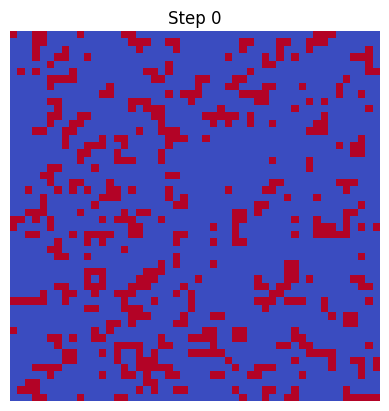

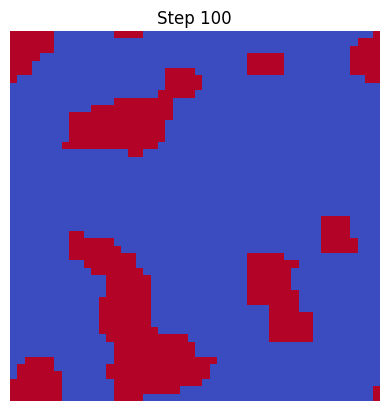

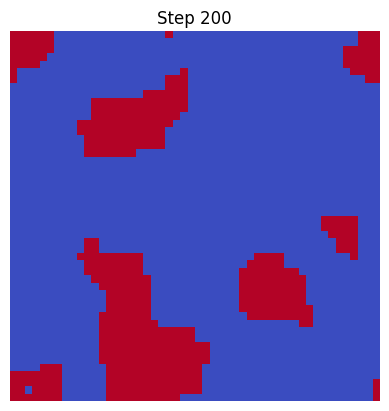

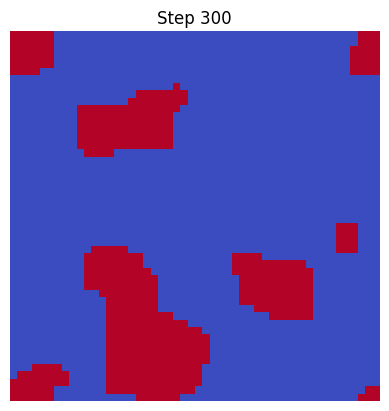

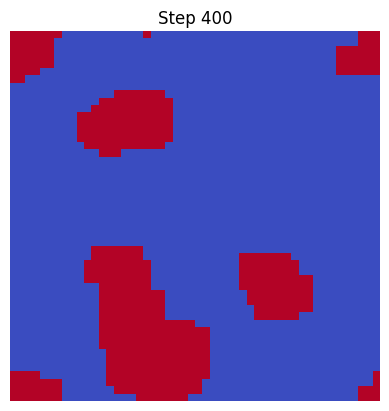

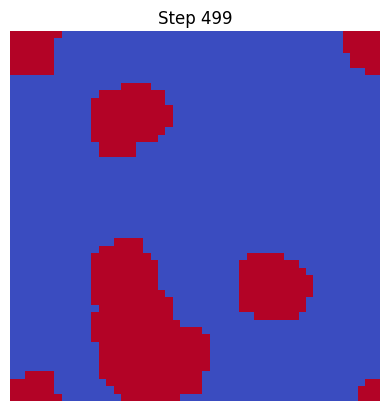

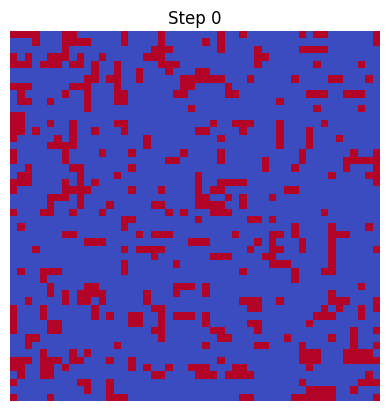

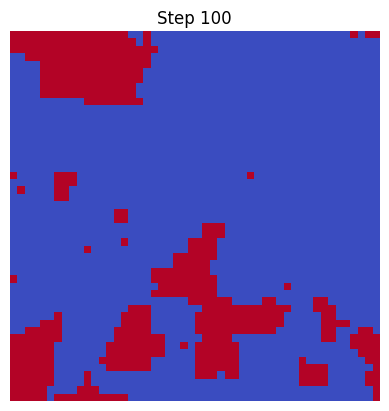

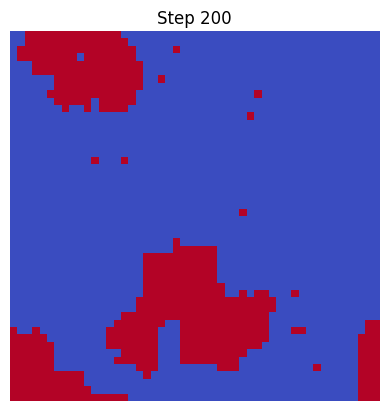

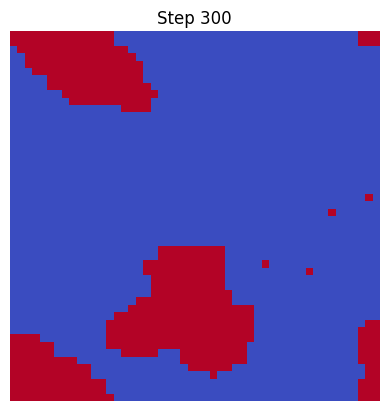

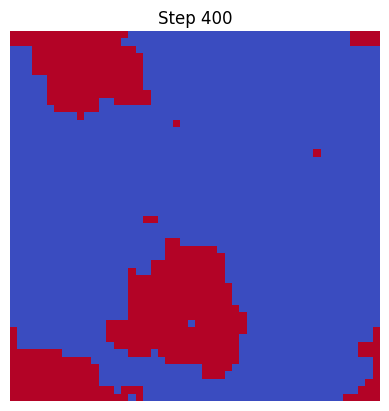

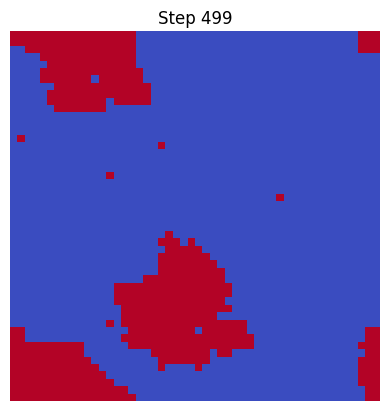

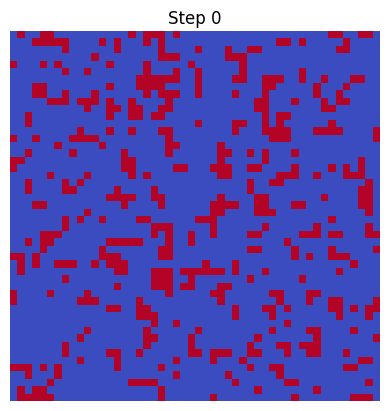

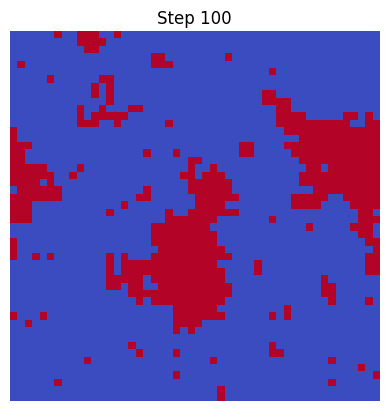

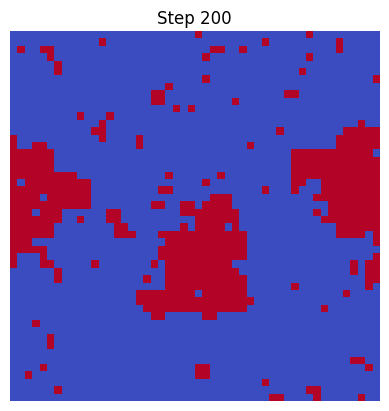

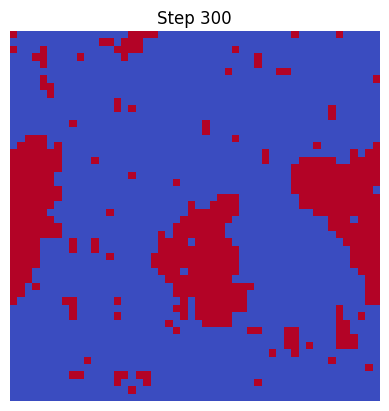

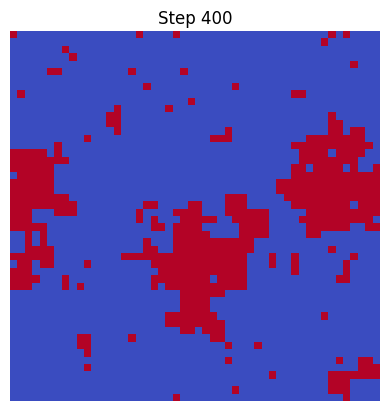

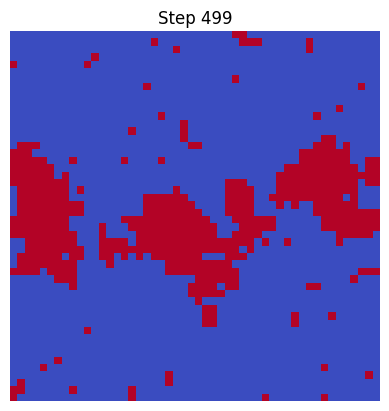

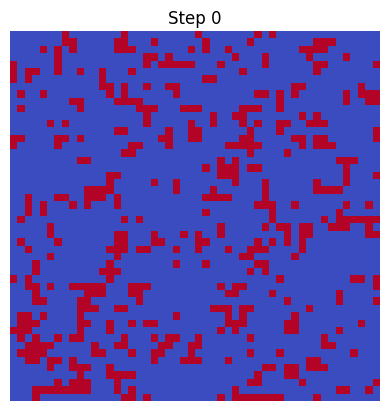

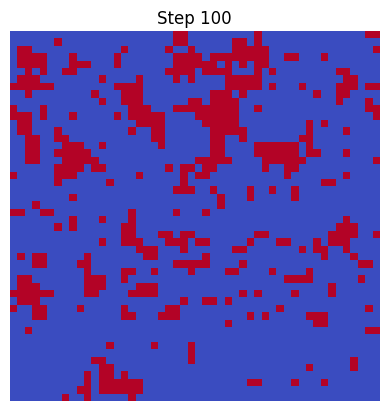

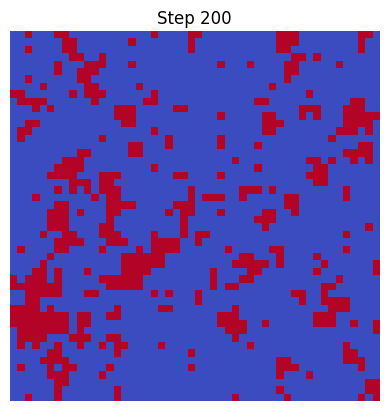

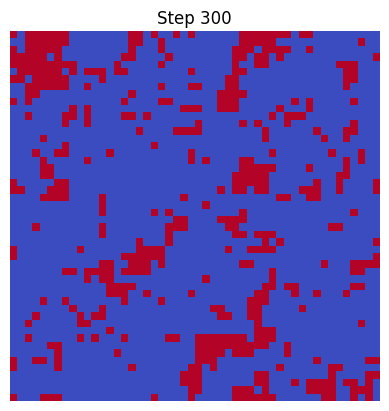

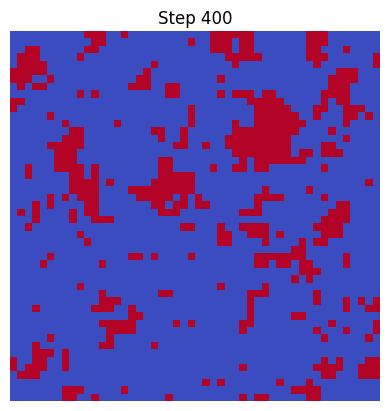

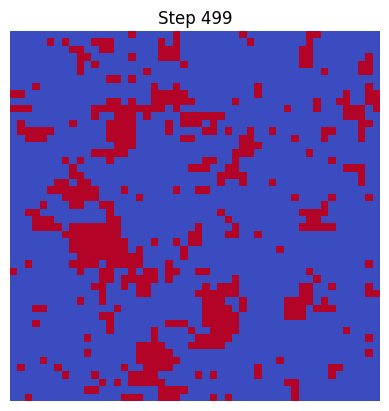

In [ ]:
# Exercise-1
for t in T:
    process(t, E_ab, frac_a )
        

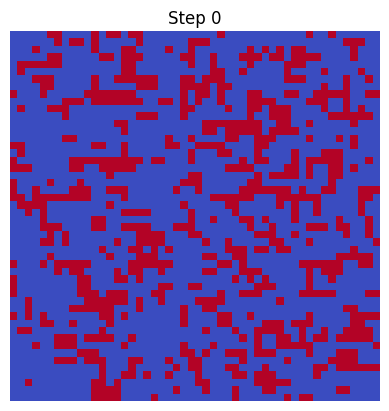

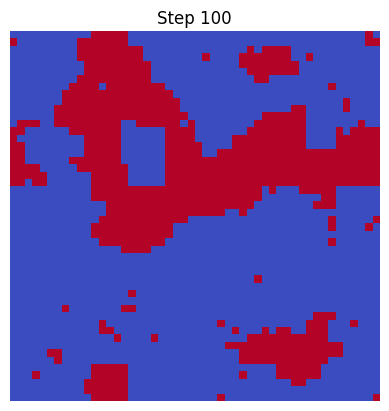

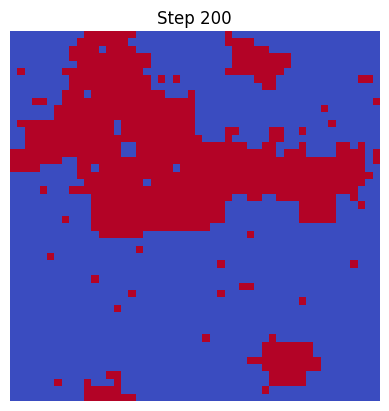

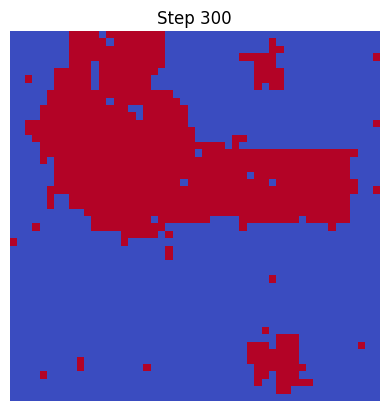

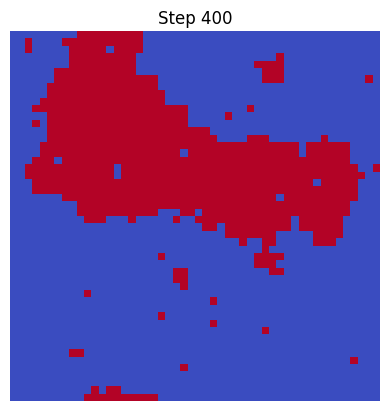

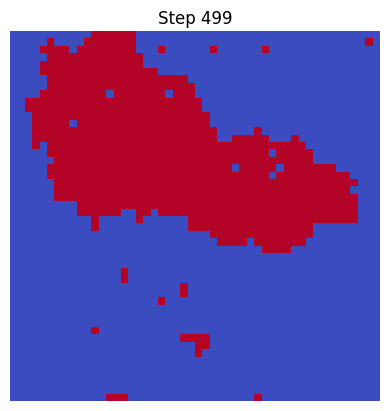

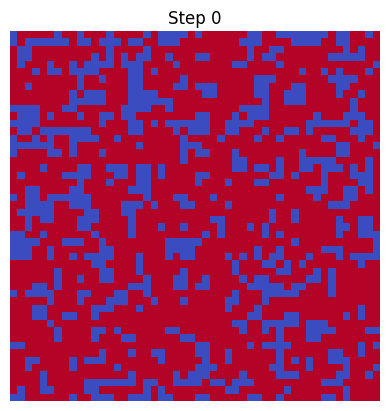

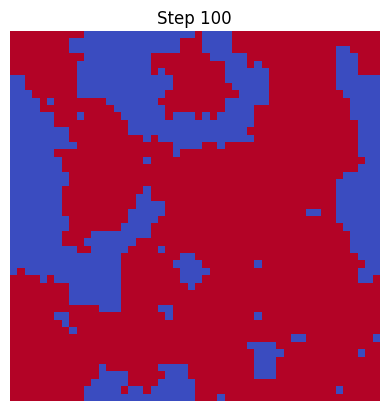

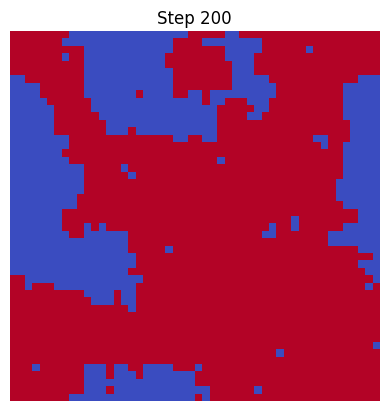

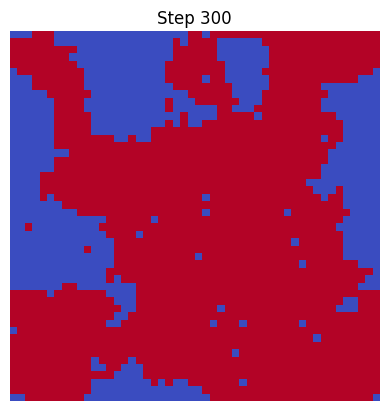

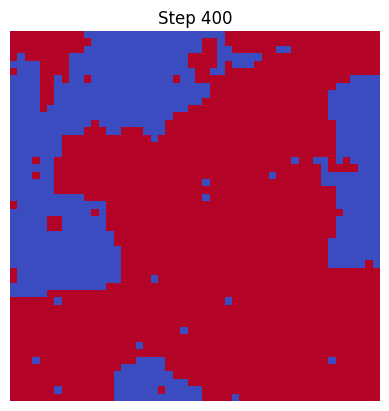

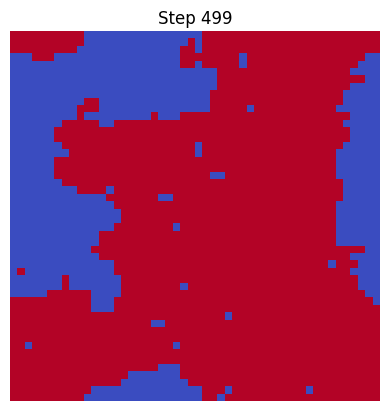

In [10]:
# Exercise - 2:
T = 1.0
fraction_A = [0.3, 0.7]
for fracA in fraction_A:
    process(T, fracA, E_ab)

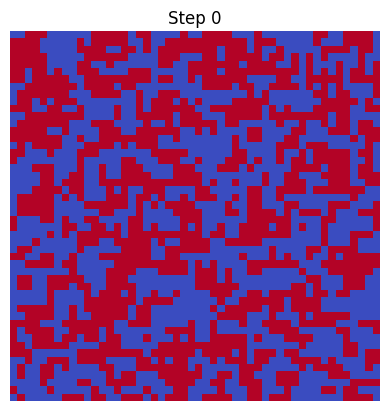

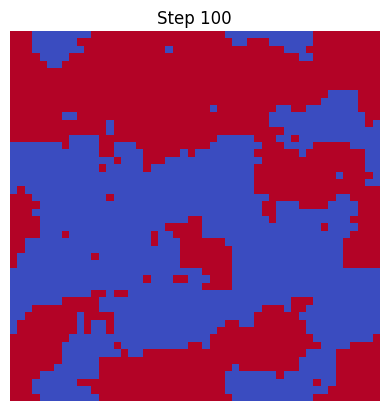

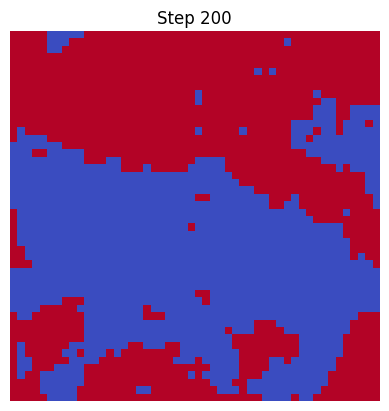

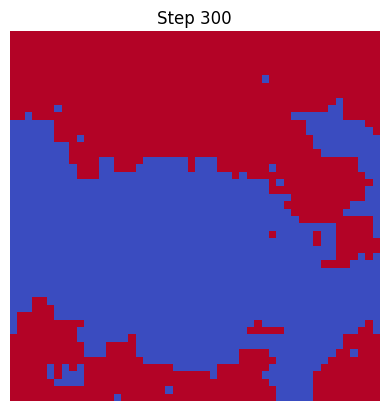

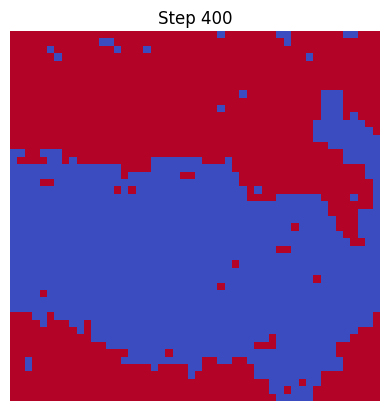

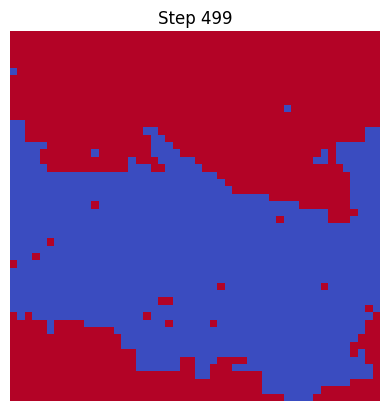

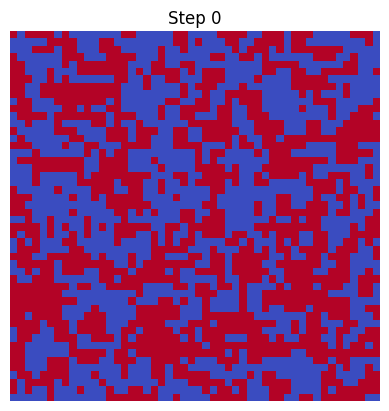

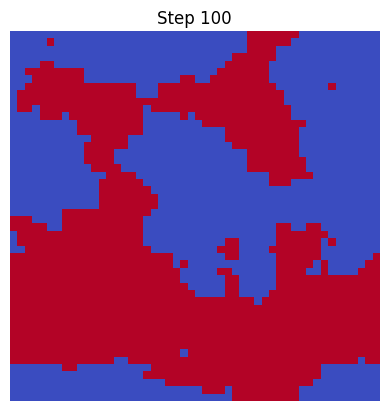

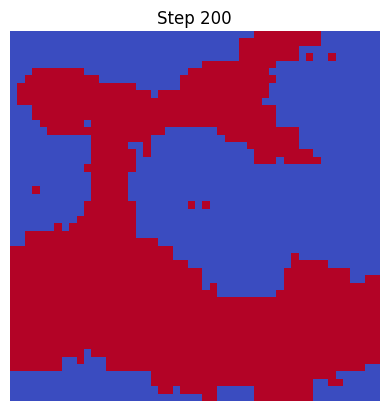

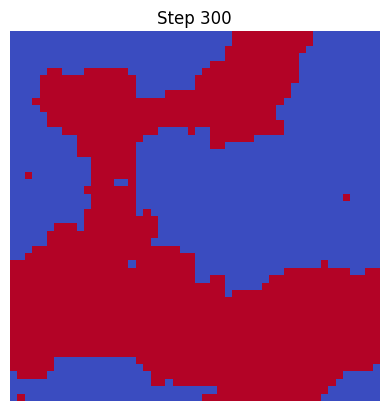

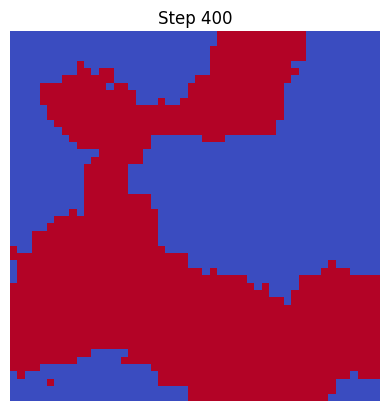

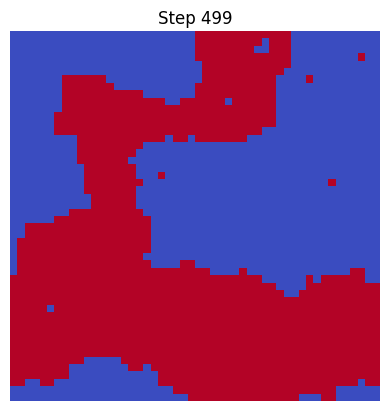

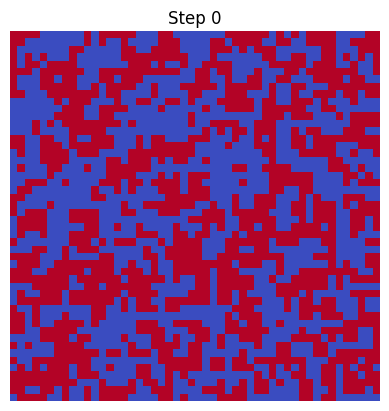

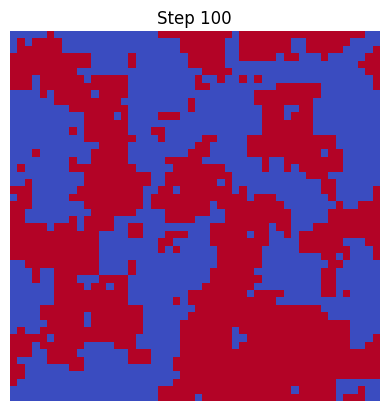

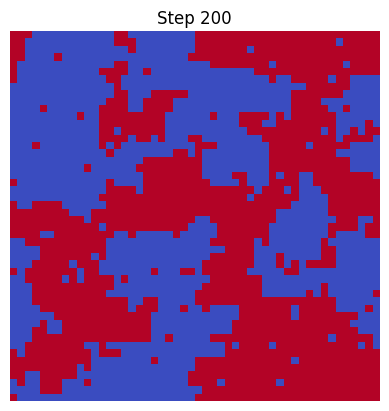

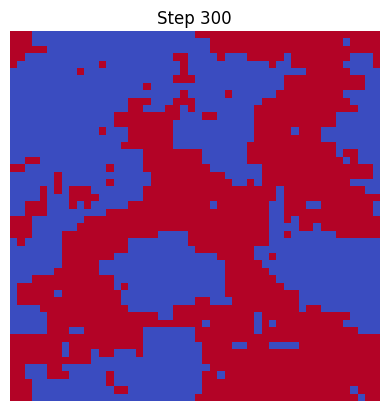

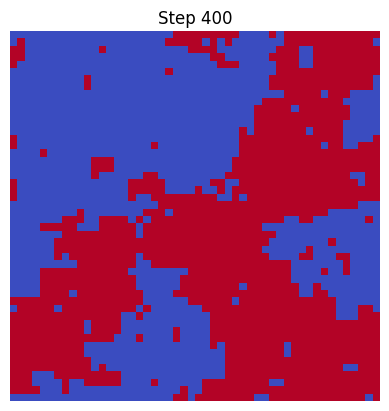

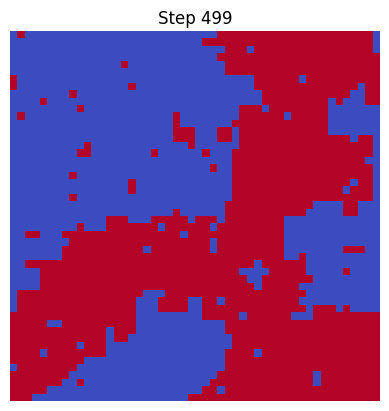

In [11]:
# Exercise -3 :
T = 1.0
fraction_A = 0.5
for E_ab in E_AB:
    process(T, fraction_A, E_ab)